---
title: "Time the Execution of a Line of Code"
description: "Use the %time and %timeit magic commands to time the execution of a single statement of code. These commands should be added to the top of the desired cell."
tags: Python Fundamentals
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: ""

---

# Example&

In [3]:
# time a 1-liner
%time sum(range(100))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


4950

In [5]:
%timeit sum(range(100))

978 ns ± 30 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [10]:
# use %% for multi-line code
%%timeit
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

252 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


---
title: "Profile Full Scripts"
description: "IPython's %prun magic function is an easy way to use the built-in code profiler"
tags: Python Fundamentals
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: ""

---

# Example&

In [11]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

In [13]:
%prun sum_of_lists(1000000)

The output is opened in a pager and looks like this:

```
14 function calls in 0.581 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        5    0.511    0.102    0.511    0.102 <ipython-input-11-f105717832a2>:4(<listcomp>)
        5    0.042    0.008    0.042    0.008 {built-in method builtins.sum}
        1    0.021    0.021    0.574    0.574 <ipython-input-11-f105717832a2>:1(sum_of_lists)
        1    0.007    0.007    0.581    0.581 <string>:1(<module>)
        1    0.000    0.000    0.581    0.581 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
```

---
title: "Specialized Ufuncs"
description: "The scipy.special submodule contains many more universal functions (in addition to all the ones that come with NumPy). Here we'll look at a couple of examples with functions useful to statisticians."
tags: Statistics, Numpy
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "Gamma functions Error function (integral of Gaussian) its complement, and its inverse"

---

In [17]:
import numpy as np
from scipy import special

# Example&

In [18]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


# Example&

In [19]:
# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)  = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


# Learn More&

Learn more in the documentation for scipy's special submodule here: https://docs.scipy.org/doc/scipy/reference/special.html

---
title: "Center An Array"
description: "Centering an array is a common example of NumPy's broadcasting rules being used in practice. "
tags: Numpy
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "broadcasting rules broadcast"

---

# Example&

In [21]:
X = np.random.random((10, 3))
X

array([[0.02775005, 0.9897241 , 0.46408945],
       [0.8880543 , 0.36712553, 0.95054051],
       [0.91220255, 0.04173485, 0.47134025],
       [0.11850064, 0.52716986, 0.18893768],
       [0.71431642, 0.73992235, 0.15228109],
       [0.62768072, 0.60951088, 0.84766633],
       [0.52438398, 0.73774477, 0.41366023],
       [0.14723927, 0.51002467, 0.53989432],
       [0.64255513, 0.43264807, 0.18674427],
       [0.1217504 , 0.49295823, 0.94881267]])

In [22]:
Xmean = X.mean(0)
Xmean

array([0.47244335, 0.54485633, 0.51639668])

In [24]:
# this is the broadcasting step:
X_centered = X - Xmean

In [25]:
# check that mean is basically 0
X_centered.mean(0)

array([-2.22044605e-17, -1.11022302e-17, -6.66133815e-17])

---
title: "Plot A 2D Function"
description: "Plotting a two-dimensional function is a good example of NumPy's broadcasting rules being used in practice. We can use broadcasting to compute a function z = f(x,y) across the grid."
tags: Numpy, Matplotlib
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "broadcasting rules broadcast"

---

# Example&

In [26]:
# preliminaries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

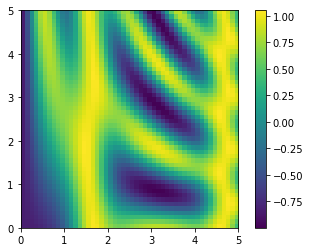

In [28]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

---
title: "Count the Number of True Entries in a Boolean Array"
description: "To count the number of True values in a NumPy ndarray, we can use count_nonzero function."
tags: Numpy
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "count_nonzero"

---

# Example&

In [30]:
import numpy as np

In [38]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [40]:
# how many values less than 6?
print(x < 6)
np.count_nonzero(x < 6)

[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]


8

---
title: "Boolean Arrays As Masks"
description: "Using boolean arrays as masks is a way to select subsets of an array that pass some boolean expression. To select a subset of particular values, simply index the boolean expression to get back a 1D array of the values."
tags: Numpy
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "select true from boolean"

---

# Example&

In [30]:
import numpy as np

In [38]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [41]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [42]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

---
title: "Explore Fancy Indexing"
description: "Fancy indexing is a lot like accessing arrays with slices, boolean masks, or simple indices. However, for fancy indexing we pass in arrays of indices in place of scalars to access multiple elements at one time."
tags: Numpy
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "pass in arrays instead of numbers indexing"

---

# Example&

In [43]:
import numpy as np

In [44]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


**Note:** for fancy indexing, the shape of the result relects the shape of the arrays being passed in as indicies. Thus, in this example, the resulting array will be a 2 x 3 matrix.

In [48]:
ind = np.array([[3, 7, 0],
                [4, 5, 1]])
x[ind]

array([[71, 86, 51],
       [60, 20, 92]])

---
title: "Combined Indexing"
description: "Fancy indexing is a lot like accessing arrays with slices, boolean masks, or simple indices. However, for fancy indexing we pass in arrays of indices in place of scalars to access multiple elements at one time."
tags: Numpy
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "fancy and simple indexing slices and masking and fancy"

---

# Example&

In [49]:
import numpy as np

In [51]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [52]:
# fancy and simple indexing
X[2, [2, 0, 1]]

array([10,  8,  9])

In [53]:
# fancy indexing and slices 
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [55]:
# fancy indexing and masking
row = np.array([0, 1, 2])
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

---
title: "Select Random Points With Fancy Indexing"
description: "Fancy indexing is commonly used for selecting a subset of rows from a matrix. We can randomly select n points and visualize the results. This approach can be used to partition datasets and create test/train splits."
tags: Numpy, Matplotlib
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "visualize subset of array"

---

# Example&

In [61]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

In [62]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

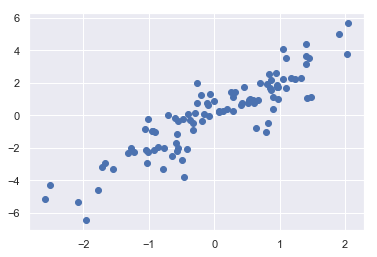

In [63]:
plt.scatter(X[:, 0], X[:, 1]);

In [64]:
# let's select 20 random incides
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([39,  8, 17, 66, 53, 92, 74, 84, 12, 63, 18, 59, 41, 49, 42, 94, 98,
       23,  7, 55])

In [65]:
# use fancy indexing to get the points
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

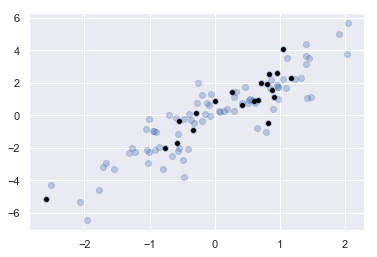

In [76]:
# fill in the random points we got
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='black', s=15);

---
title: "Modify Values of An Array With Fancy Indexing"
description: "Fancy indexing can be used to modify parts of an existing array."
tags: Numpy
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: ""

---

# Example&

In [77]:
import numpy as np

In [81]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [82]:
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

**Warning:** repeated indices with these operations can create unexpected results. For example:

In [83]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

This operation first assigns `x[0] = 4` and then `x[0] = 6`. Makes sense but now consider:

In [84]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

You may expect `x[3] = 2` and `x[4] = 3`. This result occurs because `x[i] + 1. x[i] + 1` is evaluated and then assigned to `x[i]`. The assignment happens multiple times not the incrementation. To get the incremention behavior, use the `at` method:

In [85]:
x = np.zeros(10)
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

---
title: "Fast Sorting In Numpy"
description: "NumPy uses quicksort by default to sort ndarrays. Quicksort is an O(n logn) algorithm which is the best case for comparison sorting algorithms."
tags: Numpy
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "np.sort"

---

# Key Code&

In [88]:
import numpy as np

In [89]:
# return a sorted copy without modifying original
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [90]:
# in-place sort
x.sort()
x

array([1, 2, 3, 4, 5])

---
title: "Indices of Sorted Elements"
description: "NumPy uses quicksort by default to sort ndarrays. Quicksort is an O(n logn) algorithm which is the best case for comparison sorting algorithms. Using the np.argsort we can get back the indicies of the elements in sorted order. We can use fancy indexing to get the sorted values after the fact."
tags: Numpy
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "np.argsort"

---

# Key Code&

In [88]:
import numpy as np

In [91]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
i

array([1, 0, 3, 2, 4])

In [92]:
# fancy indexing to get sorted values
x[i]

array([1, 2, 3, 4, 5])

---
title: "Sort Along Rows of Multidimensional Array"
description: "A useful feature of the np.sort method is the ability to determine to sort along the rows of a multidimensional array. We can sort on the rows independently of each other by setting `axis = 1`."
tags: Numpy
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "np.sort"

---

# Key Code&

In [88]:
import numpy as np

In [93]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [95]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

---
title: "Sort Along Columns of Multidimensional Array"
description: "A useful feature of the np.sort method is the ability to determine to sort along the columns of a multidimensional array. We can sort on the columns independently of each other by setting `axis = 0`."
tags: Numpy
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "np.sort"

---

# Key Code&

In [88]:
import numpy as np

In [93]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [96]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

---
title: "Partial Sorting: Partitioning"
description: "NumPy's np.partition function allows us to find the smallest k values in an array. The partition function takes a pivot and an array and returns a new array the values smaller than the pivot to the left of the partition and the values larger than the pivot to the right (with no particular order on either side of the pivot)."
tags: Numpy
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "np.partition multidimensional partition"

---

# Key Code&

In [88]:
import numpy as np

## Create arrays

In [101]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
x

array([7, 2, 3, 1, 6, 5, 4])

In [102]:
rand = np.random.RandomState(42)
M = rand.randint(0, 10, (4, 6))
print(M)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


## Partition

In [99]:
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [103]:
np.partition(M, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

---
title: "Detect Null Values"
description: "Pandas data structures have two useful methods, `isnull()` and `notnull()`, for detecting null values. Both return boolean masks."
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: ""

---

# Key Code&

In [105]:
import pandas as pd

In [106]:
data = pd.Series([1, np.nan, 'hello', None])

In [107]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [108]:
data[data.notnull()]

0        1
2    hello
dtype: object

---
title: "Create MultiIndex Object From Tuples"
description: "Create pandas multi-index objects from a list of tuples easily with the `pd.MultiIndex.from_tuples()` method."
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: ""

---

# Example&

In [114]:
import pandas as pd

In [110]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [111]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [112]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [113]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

---
title: "MultiIndex Stack and Unstack"
description: "The unstack() method converts a multiply indexed Series into a normally-indexed DataFrame. The stack() method does the reverses that operation. "
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: ""

---

# Example&

## Example data

In [121]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pop = pd.Series(data)
pop

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

## Unstack

In [122]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [123]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

# Example&

## Adding new data is easy with MulitIndex Objects

In [124]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
Texas      2000  20851820  4687374
           2010  25145561  4318033
New York   2000  18976457  5906301
           2010  19378102  6879014

In [125]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.311244,0.354989
Texas,0.224794,0.171721


---
title: "Other Ways To Create MultiIndex Objects"
description: "Create pandas multi-index objects by passing a list of lists into the index argument in the DataFrame object constructor. Alternatively, create a multi-index object with a dictionary with appropriate tuples as keys."
tags: Pandas, Lists, Dictionaries
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "multiindex object from dictionary"

---

# Example&

## MultiIndex Object from list of many index arrays

In [120]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.893284  0.477352
  2  0.766773  0.503955
b 1  0.281424  0.118127
  2  0.564244  0.511645

# Example&

## MultiIndex Object from dictionary

In [126]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

---
title: "Name MultiIndex Levels"
description: "Name the levels on any pandas multi-index object setting the names attribute."
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "index.names"

---

# Key Code&

In [127]:
import pandas as pd

In [129]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pop = pd.Series(data)
pop

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [130]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

---
title: "MultiIndex For Columns"
description: "The columns of a pandas DataFrame can have multiple levels too. They work just like the rows and initialization is what you might expect. Consider this example regarding some fake medical data. Essentially, this DataFrame is four-dimensional (subject, type, year, and visit). This structure is extremely valuable for complex datasets."
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: ""

---

# Example&

In [131]:
import pandas as pd

In [133]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Alice', 'Bob', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject    Alice         Bob         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      42.0  38.1  35.0  37.6  40.0  37.0
     2      30.0  36.2  40.0  36.9  37.0  37.8
2014 1      28.0  36.7  33.0  37.5  46.0  37.8
     2      60.0  38.4  19.0  37.0  41.0  35.0

In [134]:
health_data['Bob']

type          HR  Temp
year visit            
2013 1      35.0  37.6
     2      40.0  36.9
2014 1      33.0  37.5
     2      19.0  37.0

---
title: "Index and Slice MultiIndex Series"
description: "Indexing and slicing a MultiIndex is pretty intuitive. MultiIndex Series support single element access, partial indexing, partial slicing, boolean masks, and fancy indexing."
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "Multiply Indexed Series. boolean masks, fancy indexing"

---

# Example&

In [138]:
import pandas as pd

In [139]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pop = pd.Series(data)
pop

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [140]:
# single element
pop['California', 2000]

33871648

In [141]:
# partial indexing one level
pop['California']

2000    33871648
2010    37253956
dtype: int64

In [163]:
# partial slicing (if indicies are sorted)
pop = pop.sort_index()
pop.loc['California':'New York'] 

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [164]:
# partial indexing on lower levels
pop[:, 2000]

California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [165]:
# boolean masks
pop[pop > 22000000]

California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [166]:
# fancy indexing
pop[['California', 'Texas']]

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

---
title: "Index and Slice MultiIndex DataFrames"
description: "Indexing and slicing a MultiIndex is pretty intuitive. MultiIndex DataFrames support the same `.loc` and `.iloc` index methods. However, columns are primary in a DataFrame so these methods apply to the columns."
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "loc iloc"

---

# Example&

In [138]:
import pandas as pd

## Creating example data

In [133]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Alice', 'Bob', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject    Alice         Bob         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      42.0  38.1  35.0  37.6  40.0  37.0
     2      30.0  36.2  40.0  36.9  37.0  37.8
2014 1      28.0  36.7  33.0  37.5  46.0  37.8
     2      60.0  38.4  19.0  37.0  41.0  35.0

In [168]:
# simple index operations
health_data['Alice', 'HR']

year  visit
2013  1        42.0
      2        30.0
2014  1        28.0
      2        60.0
Name: (Alice, HR), dtype: float64

In [169]:
# by integer location
health_data.iloc[:2, :2]

subject    Alice      
type          HR  Temp
year visit            
2013 1      42.0  38.1
     2      30.0  36.2

In [171]:
# tuple of multiple indices
health_data.loc[:, ('Bob', 'Temp')]

year  visit
2013  1        37.6
      2        36.9
2014  1        37.5
      2        37.0
Name: (Bob, Temp), dtype: float64

---
title: "Sorted and Unsorted Indices for Multiply Indexed Data"
description: "Many of the MultiIndex slicing operations will fail if the indicies are not sorted."
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "Key length was greater than MultiIndex lexsort depth "

---

# Example&

## Create some example data

In [172]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.648346
      2      0.400879
c     1      0.940521
      2      0.865967
b     1      0.244759
      2      0.562238
dtype: float64

## Trying to take a partial index of this index will throw an error:

In [175]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


## We need to sort the indices

In [176]:
data = data.sort_index()
data

char  int
a     1      0.648346
      2      0.400879
b     1      0.244759
      2      0.562238
c     1      0.940521
      2      0.865967
dtype: float64

In [177]:
data['a':'b']

char  int
a     1      0.648346
      2      0.400879
b     1      0.244759
      2      0.562238
dtype: float64

---
title: "Set And Reset Indices For Multiply Indexed Data"
description: "You can turn the index labels into columns with the `reset_index()` method. To build a MultiIndex from the column values of a DataFrame, you can use the `set_index()` method which returns a MultiIndex DataFrame."
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: ""

---

# Example&

## Create some example data

In [181]:
import pandas as pd
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pop = pd.Series(data)
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

## Index Resetting

In [185]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,Texas,2000,20851820
3,Texas,2010,25145561
4,New York,2000,18976457
5,New York,2010,19378102


## Index Setting

In [183]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
Texas      2000    20851820
           2010    25145561
New York   2000    18976457
           2010    19378102

In [177]:
data['a':'b']

char  int
a     1      0.648346
      2      0.400879
b     1      0.244759
      2      0.562238
dtype: float64

---
title: "Aggregate Data on Multi-Indices"
description: "Pandas comes built-in with many aggregation methods like `mean()`, `sum()`, and `max()`. For hierarchically indexed data, you can pass an additional argument `level` to specify which subset of the data to perform the operation on."
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "mean sum max"

---

# Example&

## Create some example data

In [186]:
import pandas as pd
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Alice', 'Bob', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject    Alice         Bob         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      52.0  35.4  33.0  36.7  29.0  35.9
     2      32.0  36.6  37.0  35.8  43.0  38.3
2014 1      52.0  38.1  39.0  37.6  35.0  38.1
     2      33.0  37.2  39.0  38.9  35.0  38.0

## Mean on year rows

In [187]:
data_mean = health_data.mean(level='year')
data_mean

subject Alice          Bob          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     42.0  36.00  35.0  36.25  36.0  37.10
2014     42.5  37.65  39.0  38.25  35.0  38.05

## Mean on type columns

In [188]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,37.666667,36.450000
2014,38.833333,37.983333


---
title: "Groupby Aggregate"
description: "GroupBy objects have an aggregate (agg) method that aggregates using one or more operations over a specified axis. Aggregate can take a string, function, or a list of both."
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "agg groupby"

---

# Key Code&

In [191]:
import pandas as pd

In [ ]:
df.groupby('column').agg(string_function_or_list)

# Example&

## Create example data

In [193]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


## Aggregate in many different ways

In [196]:
import numpy as np
df.groupby('regiment').agg(['min', np.median, max])

preTestScore            postTestScore           
                    min median max           min median max
regiment                                                   
Dragoons              3   14.0  31            25   63.5  94
Nighthawks            2   14.0  31            25   59.5  94
Scouts                2    2.5   3            62   66.0  70

---
title: "Groupby Filter"
description: "GroupBy objects have a filter() method that allows you to drop data based off the group's properties. Filter takes a function that should return True or False."
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "drop rows"

---

# Key Code&

In [191]:
import pandas as pd

In [ ]:
df.groupby('column').filter(filter_function)

# Example&

## Create example data

In [212]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


## Filter out by lambda function

In [214]:
df.groupby('company').filter(
    lambda row : row['preTestScore'].std() > 10. )

,regiment,company,name,preTestScore,postTestScore
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
10,Scouts,2nd,Riani,2,62
11,Scouts,2nd,Ali,3,70


---
title: "Groupby Transform All Values"
description: "GroupBy objects have a transform() method that allows you to transform all the values in a DataFrame. Transform takes a function that will apply to all the values in the DataFrame. A common example is to center the data by subtracting the group mean."
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "center the data by subtracting the group mean"

---

# Key Code&

In [191]:
import pandas as pd

In [ ]:
df.groupby('key').transform(function)

# Example&

## Create example data

In [190]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


## Transformation: center the data by group mean

In [215]:
df.groupby('regiment').transform(lambda x: x - x.mean())

,preTestScore,postTestScore
0,-11.25,-34.5
1,8.75,34.5
2,15.75,-2.5
3,-13.25,2.5
4,-12.50,8.5
5,-11.50,-36.5
6,8.50,32.5
7,15.50,-4.5
8,-0.50,-4.0
9,0.50,4.0


---
title: "Groupby: List Providing Groups"
description: "Instead of splitting a DataFrame by one column with groupby, you can pass a list or Series providing the grouping keys."
tags: Pandas, Lists
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "groupby by list"

---

# Key Code&

In [191]:
import pandas as pd

In [ ]:
# len (list) must equal len(df)
df.groupby(list).mean()

# Example&

## Create example data

In [216]:
import numpy as np
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


## List providing the groups

In [218]:
L = ["group_1", "group_2", "group_1", 
     "group_2", "group_3", "group_1"]
df.groupby(L).sum()

,data1,data2
group_1,7,17
group_2,4,3
group_3,4,7


In [220]:
len(df) == len(L)

True

---
title: "Groupby: Dictionary Providing Groups"
description: "Instead of splitting a DataFrame by one column with groupby, you can pass a dictionary that maps the index values to the group keys."
tags: Pandas, Dictionaries
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "groupby by dictionary"

---

# Key Code&

In [191]:
import pandas as pd

In [ ]:
df.groupby(mapping).mean()

# Example&

## Create example data

In [216]:
import numpy as np
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


## Groupby dictionary mapping

In [221]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df2.groupby(mapping).sum()

,data1,data2
consonant,12,19
vowel,3,8


---
title: "Groupby: Function Providing Groups"
description: "Instead of splitting a DataFrame by one column with groupby, you can pass in a function that will input the index value and output the group."
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "groupby by output from function"

---

# Key Code&

In [191]:
import pandas as pd

In [ ]:
df.groupby(your_function).mean()

# Example&

## Create example data

In [222]:
import numpy as np
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


## Using a function to output groups

In [225]:
df2 = df.set_index('key')
df2.groupby(str.lower).mean()

,data1,data2
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


---
title: "Multi-Level Pivot Tables"
description: "Groupings in pivot tables can be specified with multiple levels using the `cut()` and `qcut()` methods. Cut segments/bins data into discrete intervals while qcut is a quantile-based discretization function."
tags: Pandas
URL: https://github.com/jakevdp/PythonDataScienceHandbook/
Licence: MIT for code, Text is copyrighted
Creator: 
Meta: "groupby by output from function"

---

# Example

## Create some example data

In [2]:
import pandas as pd
import numpy as np

In [23]:
data = {
    "sept": [8, 10, 4, 9],
    "oct": [8, 9, 11, 10],
    "nov": [9, 10, 5, 11],
}
grades = pd.DataFrame(data, index=["alice", "bob", "charles", 'darwin'])
grades = grades.stack().reset_index()
grades.columns = ["name", "month", "grade"]
grades['bonus'] = [1, 0, 0, 0, 2, 2, 3, 3, 0, 0, 1, 0]
grades

,name,month,grade,bonus
0,alice,sept,8,1
1,alice,oct,8,0
2,alice,nov,9,0
3,bob,sept,10,0
4,bob,oct,9,2
5,bob,nov,10,2
6,charles,sept,4,3
7,charles,oct,11,3
8,charles,nov,5,0
9,darwin,sept,9,0


## Using `cut()`

In [24]:
grade = pd.cut(grades['grade'], [0,8,11])
grades.pivot_table('bonus', ['name', grade])

bonus
name    grade            
alice   (0, 8]   0.500000
        (8, 11]  0.000000
bob     (8, 11]  1.333333
charles (0, 8]   1.500000
        (8, 11]  3.000000
darwin  (8, 11]  0.333333

## Using `qcut()`

In [29]:
t = pd.qcut(grades['grade'],5)
grades.pivot_table('bonus', ['name', t])

bonus
name    grade              
alice   (3.999, 8.0]    0.5
        (8.0, 9.0]      0.0
bob     (8.0, 9.0]      2.0
        (9.6, 10.0]     1.0
charles (3.999, 8.0]    1.5
        (10.0, 11.0]    3.0
darwin  (8.0, 9.0]      0.0
        (9.6, 10.0]     1.0
        (10.0, 11.0]    0.0